# N-gram analysis of single document
An n-gram is a sequence of n consecutive words from a text document

We can use NLTK to perform n-gram analysis of our two datasets

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fitz
import nltk
from nltk.corpus import stopwords
import re
import unicodedata

NLTK requires three one-time downloads to access tokenizers and corpora

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/george/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/george/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/george/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

We will use the National Planning Policy Framework (Sept 2023) as our test data source


## Extraction and cleaning

In [11]:
def extractPDF(doc):
    """
    Opens the PDF document, tokenizes text and cleans using regex.
    """
    doc = fitz.open(doc)
    text = ""
    for page in doc:
        text = text + page.get_text()    
    
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [12]:
def ngram_clean(text):
  """
  Tokenizes text, cleans using regex, lemmatizes, removes stopwords, forces lower case - returning a list of words.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [13]:
text_nppf = extractPDF('pdfs/NPPF_Sept_23.pdf')
tokens_nppf = ngram_clean(text_nppf)
print(tokens_nppf)

['national', 'planning', 'policy', 'framework', 'crown', 'copyright', 'copyright', 'typographical', 'arrangement', 'rest', 'crown', 'may', 'reuse', 'information', 'including', 'logo', 'free', 'charge', 'format', 'medium', 'term', 'open', 'government', 'licence', 'view', 'licence', 'visit', 'httpwwwnationalarchivesgovukdocopengovernmentlicenceversion', 'documentpublication', 'also', 'available', 'website', 'wwwgovukdluhc', 'enquiry', 'regarding', 'documentpublication', 'email', 'correspondencelevellingupgovuk', 'write', 'u', 'department', 'levelling', 'housing', 'community', 'fry', 'building', 'marsham', 'street', 'london', 'swp', 'df', 'telephone', 'latest', 'news', 'update', 'follow', 'u', 'twitter', 'httpstwittercomluhc', 'september', 'content', 'introduction', 'achieving', 'sustainable', 'development', 'planmaking', 'decisionmaking', 'delivering', 'sufficient', 'supply', 'home', 'building', 'strong', 'competitive', 'economy', 'ensuring', 'vitality', 'town', 'centre', 'promoting', 'h

## N-gram generation

We can now convert the list of tokens into a pandas series with the found n-grams

ngrams(tokens, n).value_counts, where tokens is the dataset, n is the number of sequential words and value_counts[] is the number of n-grams generated in the series

In [14]:
def ngram_gen(tokens, n, topn):
    tokens = (pd.Series(nltk.ngrams(tokens, n)).value_counts())[:topn]
    return tokens

## N-gram visualisation

### Setting global rcParams for graph customisation 

In [15]:
plt.rcParams['figure.facecolor'] = '#12273F' 
plt.rcParams['axes.facecolor'] = '#12273F'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.edgecolor']='#FFFFFF'
plt.rcParams['axes.labelcolor']='#FFFFFF'
plt.rcParams['text.color']='#FFFFFF'
plt.rcParams['xtick.color']='#FFFFFF'
plt.rcParams['ytick.color']='#FFFFFF'

### Visualisation

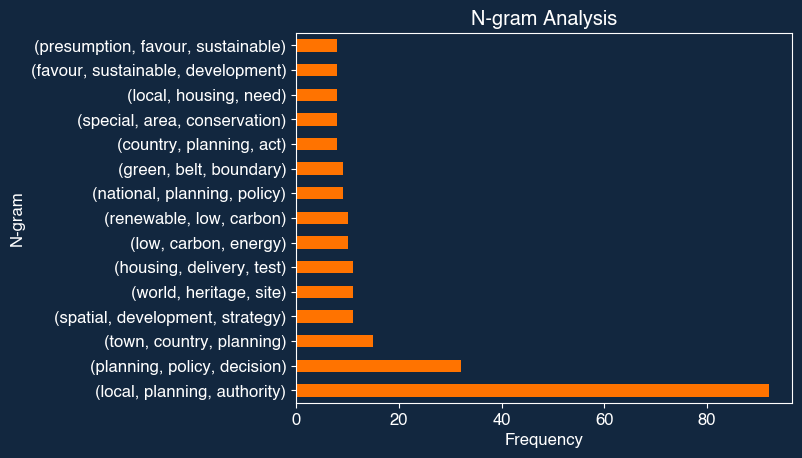

In [16]:
ngrams_nppf.plot(kind='barh', color = '#FF7300')
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.title('N-gram Analysis')
plt.show()

In [17]:
unigrams_nppf = ngram_gen(tokens_nppf, 1, 15)
bigrams_nppf = ngram_gen(tokens_nppf, 2, 15)
trigrams_nppf = ngram_gen(tokens_nppf, 3, 15)
quadgrams_nppf = ngram_gen(tokens_nppf, 4, 15)

In [25]:
%history

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fitz
import nltk
from nltk.corpus import stopwords
import re
import unicodedata
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
def extractPDF(doc):
    """
    Opens the PDF document, tokenizes text and cleans using regex.
    """
    doc = fitz.open(doc)
    text = ""
    for page in doc:
        text = text + page.get_text()    
    
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
def ngram_clean(text):
  """
  Tokenizes text, cleans using regex, lemmatizes, removes stopwords, forces lower case - returning a list of wor

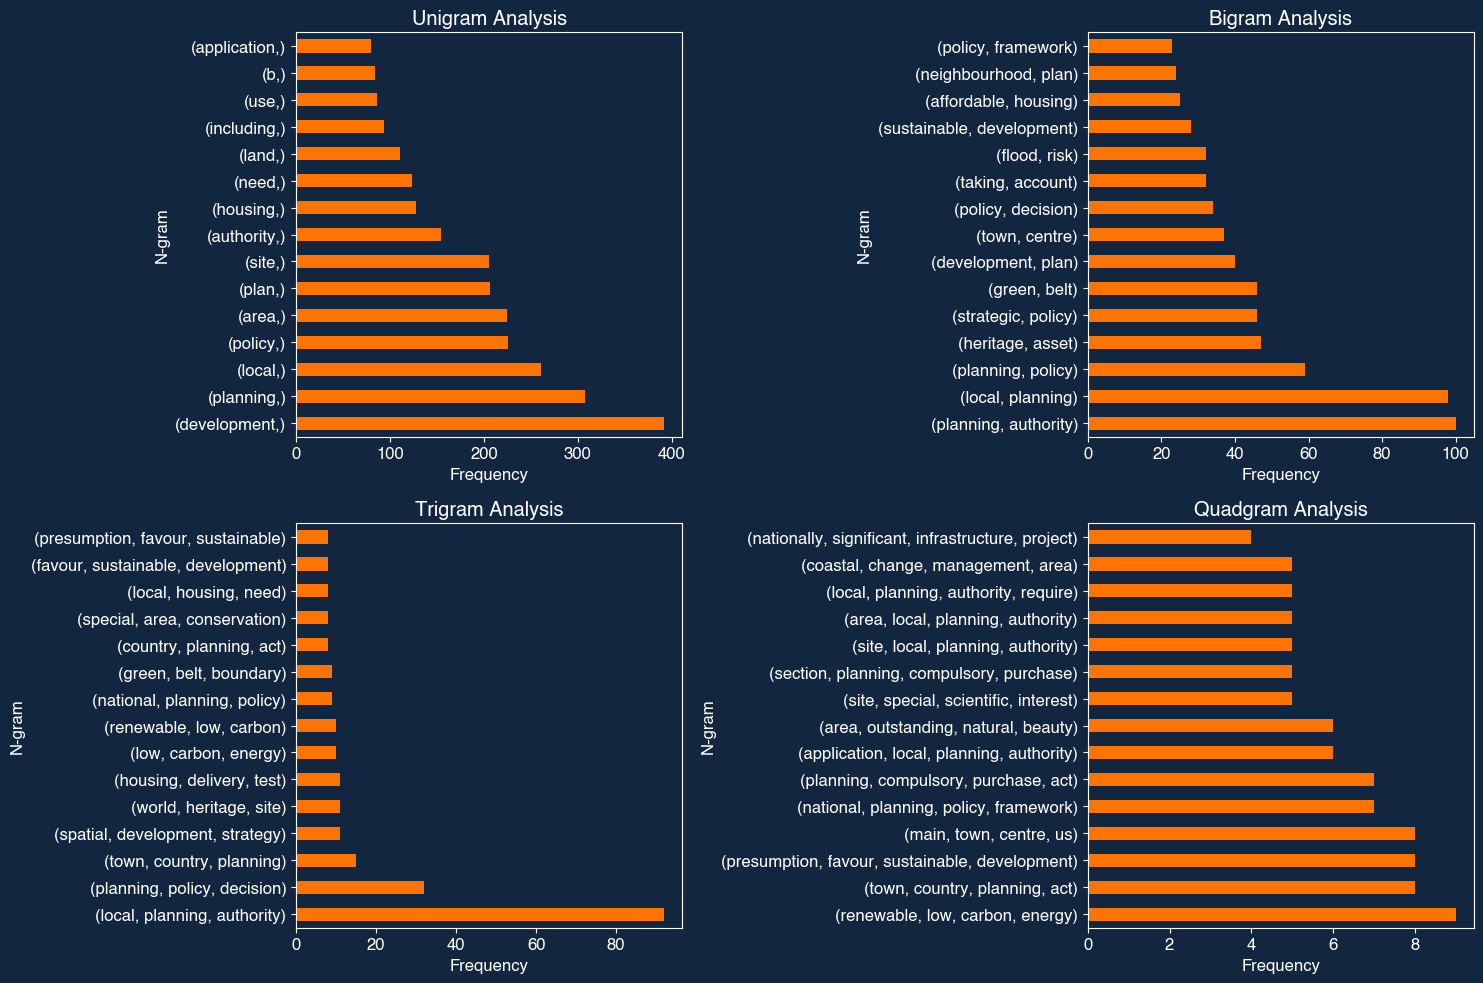

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# Plot unigram counts
unigrams_nppf.plot(kind='barh', color = '#FF7300', ax=axs[0, 0])
axs[0, 0].set_xlabel('Frequency')
axs[0, 0].set_ylabel('N-gram')
axs[0, 0].set_title('Unigram Analysis')

# Plot bigram counts
bigrams_nppf.plot(kind='barh', color = '#FF7300', ax=axs[0, 1])
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('N-gram')
axs[0, 1].set_title('Bigram Analysis')

# Plot trigram counts
trigrams_nppf.plot(kind='barh', color = '#FF7300', ax=axs[1, 0])
axs[1, 0].set_xlabel('Frequency')
axs[1, 0].set_ylabel('N-gram')
axs[1, 0].set_title('Trigram Analysis')

# Plot quadgram counts
quadgrams_nppf.plot(kind='barh', color = '#FF7300', ax=axs[1, 1])
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('N-gram')
axs[1, 1].set_title('Quadgram Analysis')

plt.tight_layout()
plt.show()